<a href="https://colab.research.google.com/github/Preetham-HD/ml_Lab/blob/main/Week1/MLlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [3]:
housing=fetch_california_housing(as_frame=True)
df=housing.frame
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


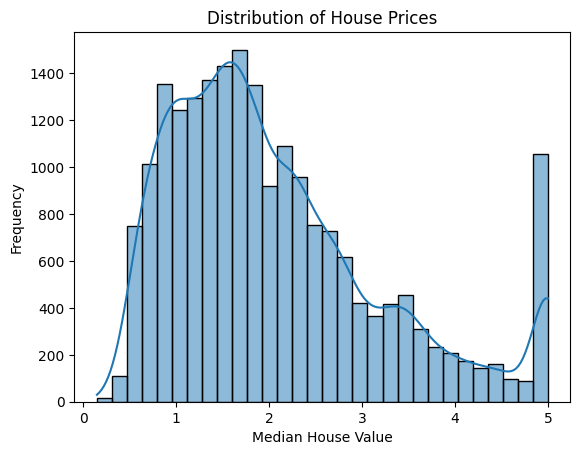

In [5]:
plt.figure()
sns.histplot(df["MedHouseVal"], bins=30, kde=True)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

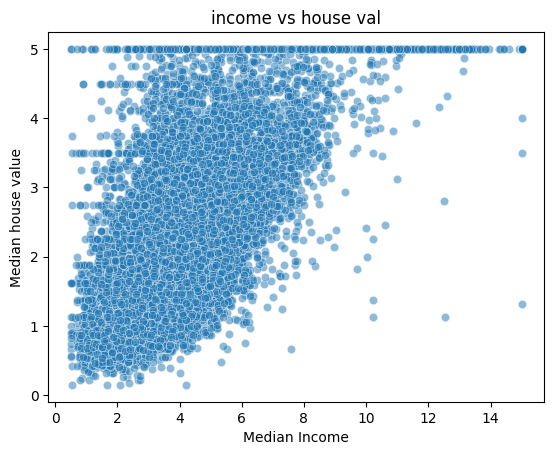

In [6]:
plt.figure()
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"], alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median house value")
plt.title("income vs house val")
plt.show()

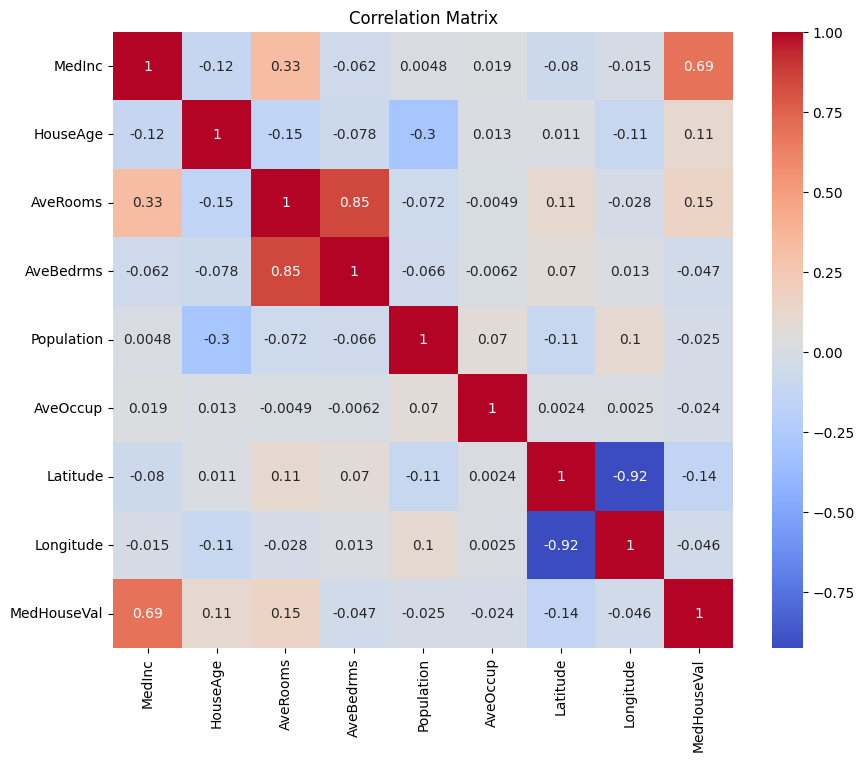

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

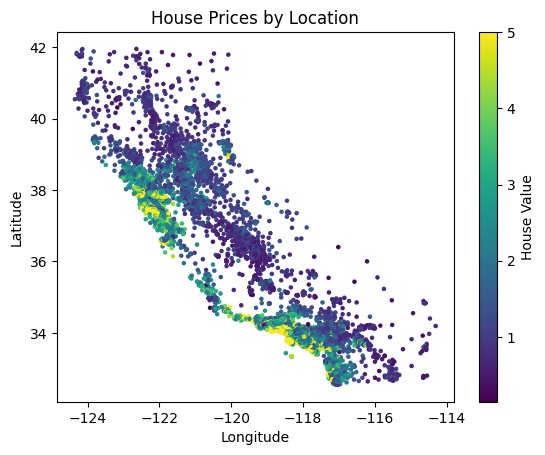

In [8]:
plt.figure()
plt.scatter(df['Longitude'], df['Latitude'],c=df['MedHouseVal'],cmap="viridis",s=5 )
plt.colorbar(label="House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Prices by Location")
plt.show()

In [9]:
df['RoomsPerHousehold'] = df['AveRooms'] / df['HouseAge']

In [10]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr, mae_lr, r2_lr

(np.float64(0.7449540928043491), 0.5330139776645934, 0.5765012224420747)

In [13]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_dt

np.float64(0.7138377373947808)

In [14]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

np.float64(0.5128644706054181)

In [15]:
param_grid = {
'n_estimators':[50, 100],
'max_depth':[None, 10, 20],
'min_samples_split':[2, 5]
}
grid_search = GridSearchCV(
rf, param_grid, cv=3,
scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
rmse_best

np.float64(0.5132629837109113)

In [16]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Tuned Random Forest'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_best]
})

results


,Model,RMSE
0,Linear Regression,0.744954
1,Decision Tree,0.713838
2,Random Forest,0.512864
3,Tuned Random Forest,0.513263
